In [1]:
from symbulate import *
%matplotlib inline
from matplotlib import pyplot as plt

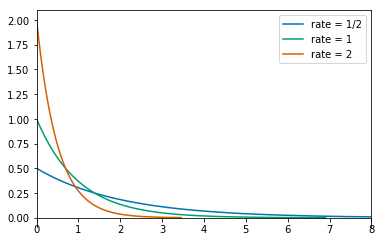

In [2]:
Exponential(rate = 1 / 2).plot()
Exponential(rate = 1).plot()
Exponential(rate = 2).plot()
plt.legend(['rate = 1/2', 'rate = 1', 'rate = 2']);
plt.xlim(0, 8);

## Exer 22.1

In [3]:
X = RV(Exponential(rate=2))

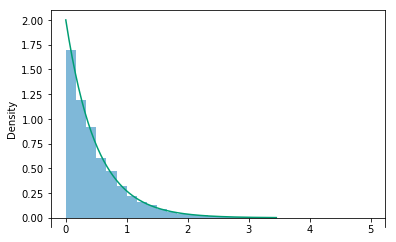

In [4]:
x = X.sim(10000)
x.plot()
Exponential(rate=2).plot()

In [5]:
x.count_gt(3) / 10000

0.002

In [6]:
1 - Exponential(rate=2).cdf(3)

0.0024787521766663767

In [7]:
x.mean()

0.5005586042838742

In [8]:
Exponential(rate=2).mean()

0.5

In [9]:
x.var()

0.24677489523916601

In [10]:
Exponential(rate=2).var()

0.25

In [11]:
x.sd()

0.4967644263020109

In [12]:
Exponential(rate=2).sd()

0.5

In [13]:
x.median()

0.35230798338090963

In [14]:
Exponential(rate=2).median()

0.34657359027997264

(29.848293546531774, 850.4598965008713, 29.16264556758991)

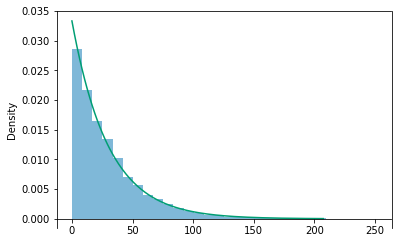

In [15]:
Y = 60 * X
y = Y.sim(10000)
y.plot()
Exponential(rate=2/60).plot()
y.mean(), y.var(), y.sd()

## Exer 22.2

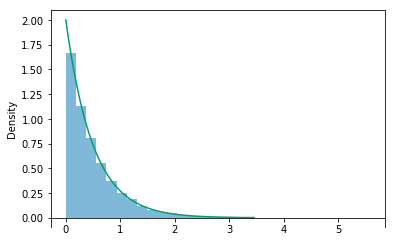

In [16]:
X = RV(Exponential(rate=1))
(X / 2).sim(10000).plot()
Exponential(rate=2).plot()

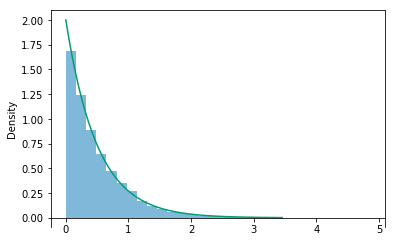

In [17]:
U = RV(Uniform(0, 1))
X = -log(U)
(X / 2).sim(10000).plot()
Exponential(rate=2).plot()

## Exer 22.3

In [18]:
X = RV(Exponential(rate=2))

In [19]:
X.sim(10000).count_gt(1) / 10000

0.1365

In [20]:
(X | (X > 2) ).sim(10000).count_gt(3) / 10000

0.13

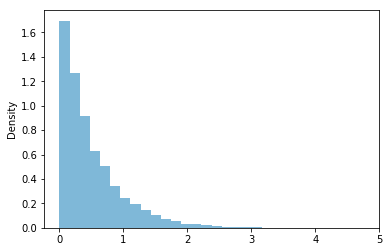

In [21]:
(X - 2 | (X > 2) ).sim(10000).plot()

## Exer 22.4

In [22]:
X1, X2 = RV(Exponential(rate=1/6) * Exponential(rate=1/9))
Y = (X1 & X2).apply(min)

(3.520344552752614, 3.518924912385541, 0.2367)

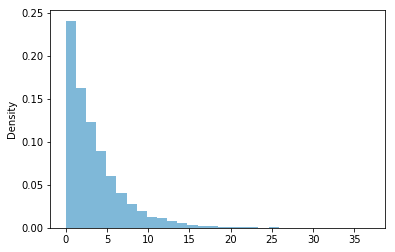

In [23]:
y = Y.sim(10000)
y.plot()
y.mean(), y.sd(), y.count_gt(5) / 10000

In [24]:
(X1 < X2).sim(10000).tabulate(normalize = True)

False,0.4027
True,0.5973
Total,1.0


In [25]:
(X1 - X2).sim(100000).count_gt(0) / 100000

0.40257

In [26]:
(Y | (X1 < X2) ).sim(10000).count_gt(5) / 10000

0.2542

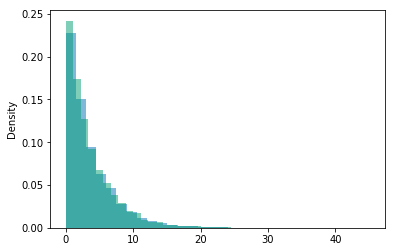

In [27]:
Y.sim(10000).plot()
(Y | (X1 < X2) ).sim(10000).plot()

(3.667022401747385, 3.6846980676206758)

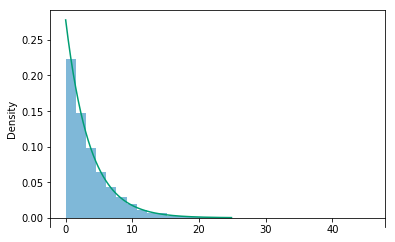

In [5]:
X, Y = RV(Exponential(1 / 6) * Exponential(1 / 9))
W = (X & Y).apply(min)
w = W.sim(10000)
w.plot()
Exponential(1 / 6 + 1 / 9).plot()
w.mean(), w.sd()

In [6]:
(Y > X).sim(10000).tabulate()

False,3927
True,6073
Total,10000


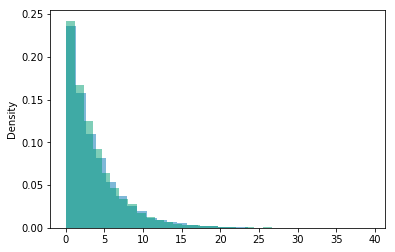

In [8]:
(W | (Y > X) ).sim(10000).plot()
(W | (Y < X) ).sim(10000).plot()

(17.946780641331998, 10.400425263144642)

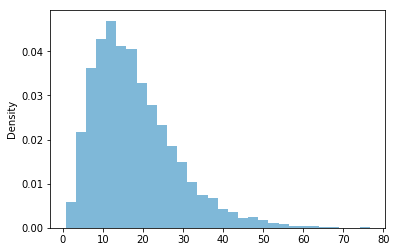

In [9]:
P = Exponential(1 / 6) ** 3
T = RV(P, sum)
t = T.sim(10000)
t.plot()
t.mean(), t.sd()

## Exer 22.5

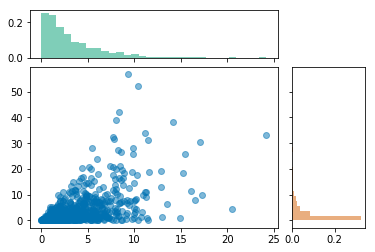

In [28]:
def exp_sim():
    x = Exponential(rate=1/3).draw()
    y = Exponential(rate=1/x).draw()
    return x, y

P = ProbabilitySpace(exp_sim)
X, Y = RV(P)
(X & Y).sim(1000).plot(['scatter', 'marginal'])

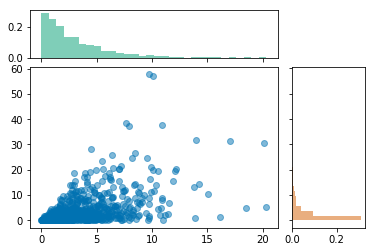

In [29]:
P = Exponential(1) ** 2
W1, W2 = RV(P)
X = W1 / (1 / 3)
Y = W2 / (1 / X)
(X & Y).sim(1000).plot(['scatter', 'marginal'])

(2.9560670482689138, 5.038735493758831)

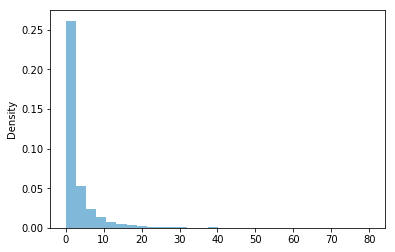

In [30]:
y = Y.sim(10000)
y.plot()
y.mean(), y.sd()

In [31]:
(X & Y).sim(10000).cov()

9.942964351325456

ValueError: invalid literal for int() with base 10: ''

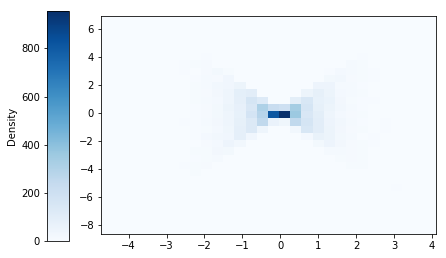

In [32]:
X, U = RV(Normal() * Uniform(-2, 2))
Y = X * U
(X & Y).sim(10000).plot('hist')

In [ ]:
X = RV(Exponential(1))
Y = 1/sqrt(X)
Y.sim(10000).sd()